In [1]:
import pandas as pd
!pip install openpyxl

attacks_df = pd.read_excel("GSAF5.xls")

# GSAF5 =xlrd.open_GSAF5("C:\Users\sofia\Documents\Data_Analytics_Ironhack\Projects\Quest_2")

attacks_df.describe()

,Year,original order
count,7010.000000,6799.000000
mean,1935.271327,3401.152081
std,271.735460,1963.076319
min,0.000000,2.000000
25%,1947.000000,1701.500000
50%,1986.000000,3401.000000
75%,2009.000000,5100.500000
max,2026.000000,6802.000000


In [2]:
attacks_df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-04-19 00:00:00,2025.0,Unprovoked,Maldives,Kulhudhuffushi City,Haa Dhaalu atoll,snorkeling,Unknown Male,M,30,...,Not stated,Todd Smith: The edition: https://en.sun.mv/96031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-04-12 00:00:00,2025.0,Unprovoked,USA,Florida,Everglades National Park Flamingo Lodge Highwa...,Undisclosed,Unknown Male,M,?,...,Not stated,Kevin McMurray Trackingsharks.com: Florida New...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-03-26 00:00:00,2025.0,Unprovoked,Australia,WA,Sandtrax Port Beach North Fremantle Perth,Swimming,Unknown Male,M,30+,...,1.5m Tiger shark,Kevin McMurray Trackingsharks.com: www.surfer....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-03-10 00:00:00,2025.0,Unprovoked,Australia,WA,Duke of Orleans Bay,Surfing,Steven Jeffrey Payne,M,37,...,Great White Shark,Bob Myatt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-03-07 00:00:00,2025.0,Unprovoked,Australia,NSW,Gunyah beach Bundeena Port Hacking,Swimming,Mangyong Zhang,F,56,...,Bull shark,Bob Myatt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
attacks_df.shape

(7012, 23)

In [4]:
attacks_clean_df=attacks_df.drop(['pdf', 'href formula' , 'href' , 'Case Number' , 'Case Number.1' , 'original order' , 'Unnamed: 21' , 'Unnamed: 22' , 'Source' , 'Time' , 'Injury' , 'Name' , 'Location' , 'Type' , 'Year'], axis=1)
attacks_clean_df
# Removed columns that we are not using

,Date,Country,State,Activity,Sex,Age,Fatal Y/N,Species
0,2025-04-19 00:00:00,Maldives,Kulhudhuffushi City,snorkeling,M,30,N,Not stated
1,2025-04-12 00:00:00,USA,Florida,Undisclosed,M,?,N,Not stated
2,2025-03-26 00:00:00,Australia,WA,Swimming,M,30+,N,1.5m Tiger shark
3,2025-03-10 00:00:00,Australia,WA,Surfing,M,37,Y,Great White Shark
4,2025-03-07 00:00:00,Australia,NSW,Swimming,F,56,N,Bull shark
...,...,...,...,...,...,...,...,...
7007,Before 1903,AUSTRALIA,Western Australia,Diving,M,NaN,Y,NaN
7008,Before 1903,AUSTRALIA,Western Australia,Pearl diving,M,NaN,Y,NaN
7009,1900-1905,USA,North Carolina,Swimming,M,NaN,Y,NaN
7010,1883-1889,PANAMA,NaN,NaN,M,NaN,Y,NaN


In [5]:
attacks_clean_df.describe()

,Date,Country,State,Activity,Sex,Age,Fatal Y/N,Species
count,7012,6962,6527,6427,6433,4018,6451,3881
unique,6057,242,926,1604,10,249,12,1712
top,1957,USA,Florida,Surfing,M,16,N,White shark
freq,9,2558,1186,1133,5624,92,4883,194


In [6]:
attacks_clean_country=attacks_clean_df["Country"] = attacks_clean_df["Country"].apply(
    lambda aus: "Australia" if str(aus).strip().lower() == "australia" else aus
)


In [7]:
attacks_clean_country=attacks_clean_country["Country"] = attacks_clean_df["Country"].apply(
    lambda us: "USA" if str(us).strip().lower() == "usa" else us
)

# USA and Australia ortography fix

In [8]:
def get_locations(row):
    if row["Country"] == "USA":
        return str(row["Country"]) + "_" + str(row["State"])
    elif row["Country"] == "Australia":
        return str(row["Country"]) + "_" + str(row["State"])
    else:
        return row["Country"]


attacks_clean_df["Country_clean"] = attacks_clean_df.apply(get_locations, axis=1)
attacks_clean_df

# Add the state in USA and Australia to define as "countries"

,Date,Country,State,Activity,Sex,Age,Fatal Y/N,Species,Country_clean
0,2025-04-19 00:00:00,Maldives,Kulhudhuffushi City,snorkeling,M,30,N,Not stated,Maldives
1,2025-04-12 00:00:00,USA,Florida,Undisclosed,M,?,N,Not stated,USA_Florida
2,2025-03-26 00:00:00,Australia,WA,Swimming,M,30+,N,1.5m Tiger shark,Australia_WA
3,2025-03-10 00:00:00,Australia,WA,Surfing,M,37,Y,Great White Shark,Australia_WA
4,2025-03-07 00:00:00,Australia,NSW,Swimming,F,56,N,Bull shark,Australia_NSW
...,...,...,...,...,...,...,...,...,...
7007,Before 1903,Australia,Western Australia,Diving,M,NaN,Y,NaN,Australia_Western Australia
7008,Before 1903,Australia,Western Australia,Pearl diving,M,NaN,Y,NaN,Australia_Western Australia
7009,1900-1905,USA,North Carolina,Swimming,M,NaN,Y,NaN,USA_North Carolina
7010,1883-1889,PANAMA,NaN,NaN,M,NaN,Y,NaN,PANAMA


In [9]:
attacks_clean_df=attacks_clean_df.drop(['Country' , 'State'], axis=1)
attacks_clean_df

,Date,Activity,Sex,Age,Fatal Y/N,Species,Country_clean
0,2025-04-19 00:00:00,snorkeling,M,30,N,Not stated,Maldives
1,2025-04-12 00:00:00,Undisclosed,M,?,N,Not stated,USA_Florida
2,2025-03-26 00:00:00,Swimming,M,30+,N,1.5m Tiger shark,Australia_WA
3,2025-03-10 00:00:00,Surfing,M,37,Y,Great White Shark,Australia_WA
4,2025-03-07 00:00:00,Swimming,F,56,N,Bull shark,Australia_NSW
...,...,...,...,...,...,...,...
7007,Before 1903,Diving,M,NaN,Y,NaN,Australia_Western Australia
7008,Before 1903,Pearl diving,M,NaN,Y,NaN,Australia_Western Australia
7009,1900-1905,Swimming,M,NaN,Y,NaN,USA_North Carolina
7010,1883-1889,NaN,M,NaN,Y,NaN,PANAMA


In [10]:
unique_count = attacks_clean_df["Activity"].nunique()
print(unique_count)

1604


In [11]:
attacks_clean_df['Activity'] = attacks_clean_df['Activity'].astype(str).str.lower()


def categories(Activity_clean):
    if 'surf' in Activity_clean or 'board' in Activity_clean:
        return 'surfing'
    elif 'wading' in Activity_clean or 'swimming' in Activity_clean or 'standing' in Activity_clean:
        return 'swimming'
    elif 'fishing' in Activity_clean:
        return 'fishing'
    elif 'snork' in Activity_clean:
        return 'snorkeling'
    elif 'diving' in Activity_clean or 'dive' in Activity_clean:
        return 'diving'
    else:
        return 'others'

attacks_clean_df['Activity'] = attacks_clean_df['Activity'].apply(categories)

In [12]:
unique_count = attacks_clean_df["Activity"].nunique()
print(unique_count)

6


In [13]:
attacks_clean_df.dtypes

Date             object
Activity         object
Sex              object
Age              object
Fatal Y/N        object
Species          object
Country_clean    object
dtype: object

In [14]:
attacks_clean_df['Date'] = pd.to_datetime(attacks_clean_df['Date'], errors='coerce')

In [15]:
print(attacks_clean_df['Date'])

0      2025-04-19
1      2025-04-12
2      2025-03-26
3      2025-03-10
4      2025-03-07
          ...    
7007          NaT
7008          NaT
7009          NaT
7010          NaT
7011          NaT
Name: Date, Length: 7012, dtype: datetime64[ns]


In [16]:
attacks_clean_df['Date']=attacks_clean_df['Date'].fillna(pd.Timestamp('2100-01-01'))
print(attacks_clean_df['Date'])

0      2025-04-19
1      2025-04-12
2      2025-03-26
3      2025-03-10
4      2025-03-07
          ...    
7007   2100-01-01
7008   2100-01-01
7009   2100-01-01
7010   2100-01-01
7011   2100-01-01
Name: Date, Length: 7012, dtype: datetime64[ns]


In [17]:
# Extract the year
attacks_clean_df['Year'] = attacks_clean_df['Date'].dt.year.astype(int)
print(attacks_clean_df['Year'])

0       2025
1       2025
2       2025
3       2025
4       2025
        ... 
7007    2100
7008    2100
7009    2100
7010    2100
7011    2100
Name: Year, Length: 7012, dtype: int32


In [18]:
# Extract the month
attacks_clean_df['Month'] = attacks_clean_df['Date'].dt.month_name()
print(attacks_clean_df['Month'])

0         April
1         April
2         March
3         March
4         March
         ...   
7007    January
7008    January
7009    January
7010    January
7011    January
Name: Month, Length: 7012, dtype: object


In [19]:
print(attacks_clean_df)

           Date    Activity Sex  Age Fatal Y/N           Species   \
0    2025-04-19  snorkeling   M   30         N         Not stated   
1    2025-04-12      others   M    ?         N         Not stated   
2    2025-03-26    swimming   M  30+         N   1.5m Tiger shark   
3    2025-03-10     surfing   M   37         Y  Great White Shark   
4    2025-03-07    swimming  F    56         N         Bull shark   
...         ...         ...  ..  ...       ...                ...   
7007 2100-01-01      diving   M  NaN         Y                NaN   
7008 2100-01-01      diving   M  NaN         Y                NaN   
7009 2100-01-01    swimming   M  NaN         Y                NaN   
7010 2100-01-01      others   M  NaN         Y                NaN   
7011 2100-01-01    swimming   M   15         Y                NaN   

                    Country_clean  Year    Month  
0                        Maldives  2025    April  
1                     USA_Florida  2025    April  
2                 

In [20]:
# Group by month name and count the number of attacks
monthly_counts = attacks_clean_df.groupby(['Month']).size().reset_index(name='attack_count')

# Sort by month number to get calendar order
monthly_counts = monthly_counts.sort_values('Month')

# Drop 'month_num' if only month names and counts are needed
monthly_counts = monthly_counts[['Month', 'attack_count']]

# Print the grouped result
print(monthly_counts)

        Month  attack_count
0       April           450
1      August           602
2    December           447
3    February           389
4     January          1680
5        July           696
6        June           494
7       March           423
8         May           413
9    November           416
10    October           459
11  September           543


In [21]:
min_year = attacks_clean_df['Year'].min()
max_year = max(attacks_clean_df['Year'].max(), 2026)

# Create bin edges every 25 years
bins = list(range(min_year - (min_year % 25), max_year, 25))  # Adjust start to the nearest lower multiple of 25

# Create labels for the bins
labels = [f"{start}–{start + 24}" for start in bins[:-1]]

# Create a new column for the 25-year interval
attacks_clean_df['year_interval'] = pd.cut(attacks_clean_df['Year'], bins=bins, labels=labels, right=False)

# Display the new column
print(attacks_clean_df[['Year', 'year_interval']])

      Year year_interval
0     2025     2025–2049
1     2025     2025–2049
2     2025     2025–2049
3     2025     2025–2049
4     2025     2025–2049
...    ...           ...
7007  2100           NaN
7008  2100           NaN
7009  2100           NaN
7010  2100           NaN
7011  2100           NaN

[7012 rows x 2 columns]


In [22]:
# Group by year name and count the number of attacks
year_counts = attacks_clean_df.groupby(['year_interval']).size().reset_index(name='attack_count')

# Sort by month number to get calendar order
year_counts = year_counts.sort_values('year_interval')

# Drop 'month_num' if only month names and counts are needed
year_counts = year_counts[['year_interval', 'attack_count']]

# Print the grouped result
print(year_counts)

   year_interval  attack_count
0      1675–1699             1
1      1700–1724             3
2      1725–1749             3
3      1750–1774             3
4      1775–1799             9
5      1800–1824            16
6      1825–1849            46
7      1850–1874            88
8      1875–1899           181
9      1900–1924           275
10     1925–1949           531
11     1950–1974          1236
12     1975–1999          1121
13     2000–2024          2603
14     2025–2049            20
15     2050–2074             0


C:\Users\sofia\AppData\Local\Temp\ipykernel_25456\159151502.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_counts = attacks_clean_df.groupby(['year_interval']).size().reset_index(name='attack_count')


In [23]:
# check to see the unique values of sex, age and fatal

unique_values_sex = attacks_df["Sex"].nunique()
print(unique_values_sex)

unique_values_age = attacks_df["Age"].nunique()
print(unique_values_age)

unique_values_fatal = attacks_df["Fatal Y/N"].unique()
print(unique_values_fatal)

10
249
['N' 'Y' 'F' 'M' nan 'n' 'Nq' 'UNKNOWN' 2017 'Y x 2' ' N' 'N ' 'y']


In [24]:
# check to see how many nulls exist on the categories

sex_null = attacks_df["Sex"].isna().sum()
print(sex_null)

age_null = attacks_df["Age"].isna().sum()
print(age_null)

fatal_null = attacks_df["Fatal Y/N"].isna().sum()
print(fatal_null)

579
2994
561


In [25]:
# observe the statistics of these 3 variables

statistics_sex = attacks_clean_df["Sex"].describe()
statistics_age = attacks_clean_df["Age"].describe()
statistics_fatal = attacks_clean_df["Fatal Y/N"].describe()

print(statistics_sex)
print(statistics_age)
print(statistics_fatal)

count     6433
unique      10
top          M
freq      5624
Name: Sex, dtype: object
count     4018
unique     249
top         16
freq        92
Name: Age, dtype: int64
count     6451
unique      12
top          N
freq      4883
Name: Fatal Y/N, dtype: object


In [26]:
# starting to clean the age variable. Age is an object and we need to change it to integer

attacks_clean_df["Age"]


0        30
1         ?
2       30+
3        37
4        56
       ... 
7007    NaN
7008    NaN
7009    NaN
7010    NaN
7011     15
Name: Age, Length: 7012, dtype: object

In [27]:
# function to replace strange ages 

import numpy as np
import re

def clean_age(value):
    if pd.isna(value):
        return np.nan
    value = str(value).strip()

    #if it is an interval
    if re.match(r'^\d{1,3}-\d{1,3}$', value):
        start, end = map(int, value.split('-'))
        return (start + end) / 2
    #if it has multiple ages on the same field
    if re.match(r'^(\d{1,3},\s*)+\d{1,3}$', value):
        numbers = list(map(int, re.findall(r'\d+', value)))
        return sum(numbers) / len(numbers)

    #if it is something like 30+
    if re.match(r'\d{1,3}\+$', value):
        return int(value[:-1]) 

    # if it's just a number
    if value.isdigit():
        return int(value)
    
    # if it's ? or another thing
    return np.nan

attacks_clean_df["Age_clean"] = attacks_clean_df["Age"].apply(clean_age)
attacks_clean_df["Age_clean"] = attacks_clean_df["Age_clean"].round().astype('Int64')

attacks_clean_df

,Date,Activity,Sex,Age,Fatal Y/N,Species,Country_clean,Year,Month,year_interval,Age_clean
0,2025-04-19,snorkeling,M,30,N,Not stated,Maldives,2025,April,2025–2049,30
1,2025-04-12,others,M,?,N,Not stated,USA_Florida,2025,April,2025–2049,<NA>
2,2025-03-26,swimming,M,30+,N,1.5m Tiger shark,Australia_WA,2025,March,2025–2049,30
3,2025-03-10,surfing,M,37,Y,Great White Shark,Australia_WA,2025,March,2025–2049,37
4,2025-03-07,swimming,F,56,N,Bull shark,Australia_NSW,2025,March,2025–2049,56
...,...,...,...,...,...,...,...,...,...,...,...
7007,2100-01-01,diving,M,NaN,Y,NaN,Australia_Western Australia,2100,January,NaN,<NA>
7008,2100-01-01,diving,M,NaN,Y,NaN,Australia_Western Australia,2100,January,NaN,<NA>
7009,2100-01-01,swimming,M,NaN,Y,NaN,USA_North Carolina,2100,January,NaN,<NA>
7010,2100-01-01,others,M,NaN,Y,NaN,PANAMA,2100,January,NaN,<NA>


In [28]:
# fill in empty values with the mean
attacks_clean_df["Age_clean"] = (attacks_clean_df["Age_clean"].fillna(attacks_clean_df["Age_clean"].mean().round()).astype("Int64"))
attacks_clean_df

,Date,Activity,Sex,Age,Fatal Y/N,Species,Country_clean,Year,Month,year_interval,Age_clean
0,2025-04-19,snorkeling,M,30,N,Not stated,Maldives,2025,April,2025–2049,30
1,2025-04-12,others,M,?,N,Not stated,USA_Florida,2025,April,2025–2049,28
2,2025-03-26,swimming,M,30+,N,1.5m Tiger shark,Australia_WA,2025,March,2025–2049,30
3,2025-03-10,surfing,M,37,Y,Great White Shark,Australia_WA,2025,March,2025–2049,37
4,2025-03-07,swimming,F,56,N,Bull shark,Australia_NSW,2025,March,2025–2049,56
...,...,...,...,...,...,...,...,...,...,...,...
7007,2100-01-01,diving,M,NaN,Y,NaN,Australia_Western Australia,2100,January,NaN,28
7008,2100-01-01,diving,M,NaN,Y,NaN,Australia_Western Australia,2100,January,NaN,28
7009,2100-01-01,swimming,M,NaN,Y,NaN,USA_North Carolina,2100,January,NaN,28
7010,2100-01-01,others,M,NaN,Y,NaN,PANAMA,2100,January,NaN,28


In [29]:
# observe the statistics of Age
attacks_clean_df.describe()

,Date,Year,Age_clean
count,7012,7012.000000,7012.0
mean,1994-04-03 03:02:34.021677184,1993.834427,28.075585
min,1691-01-01 00:00:00,1691.000000,1.0
25%,1962-10-31 00:00:00,1962.000000,22.0
50%,1999-12-01 00:00:00,1999.000000,28.0
75%,2016-07-28 06:00:00,2016.000000,28.0
max,2100-01-01 00:00:00,2100.000000,87.0
std,NaN,56.016473,10.855819


In [30]:
# study what is inside the Sex variable


attacks_clean_df["Sex"].value_counts(dropna=False)

Sex
M        5624
F         798
NaN       579
M           3
N           2
F           1
 M          1
m           1
lli         1
M x 2       1
.           1
Name: count, dtype: int64

In [31]:
# function to format the sex variable, replacing odd strings with F,M or unknown and adding a new columns Sex_clean


def clean_sex(value):
    if pd.isna(value):
        return "Unknown"
    
    val = str(value).strip().upper() # remove spaces and everything is written in caps lock

    if val in ["M", "Male", "M x 2", "M. "]:
        return "M"
    elif val in ["F", "FEMALE"]:
        return "F"
    else:
        return "Unknown" # removes everything that is not recognized

attacks_clean_df["Sex_clean"] = attacks_clean_df["Sex"].apply(clean_sex)

attacks_clean_df

,Date,Activity,Sex,Age,Fatal Y/N,Species,Country_clean,Year,Month,year_interval,Age_clean,Sex_clean
0,2025-04-19,snorkeling,M,30,N,Not stated,Maldives,2025,April,2025–2049,30,M
1,2025-04-12,others,M,?,N,Not stated,USA_Florida,2025,April,2025–2049,28,M
2,2025-03-26,swimming,M,30+,N,1.5m Tiger shark,Australia_WA,2025,March,2025–2049,30,M
3,2025-03-10,surfing,M,37,Y,Great White Shark,Australia_WA,2025,March,2025–2049,37,M
4,2025-03-07,swimming,F,56,N,Bull shark,Australia_NSW,2025,March,2025–2049,56,F
...,...,...,...,...,...,...,...,...,...,...,...,...
7007,2100-01-01,diving,M,NaN,Y,NaN,Australia_Western Australia,2100,January,NaN,28,M
7008,2100-01-01,diving,M,NaN,Y,NaN,Australia_Western Australia,2100,January,NaN,28,M
7009,2100-01-01,swimming,M,NaN,Y,NaN,USA_North Carolina,2100,January,NaN,28,M
7010,2100-01-01,others,M,NaN,Y,NaN,PANAMA,2100,January,NaN,28,M


In [32]:
# check to see if the function worked

attacks_clean_df["Sex_clean"].value_counts(dropna=False)

Sex_clean
M          5629
F           799
Unknown     584
Name: count, dtype: int64

In [33]:
# study the fatal variable. We can see that there are a lot of different names to represente Y or N and we have to clean it

attacks_clean_df["Fatal Y/N"].value_counts(dropna=False)

Fatal Y/N
N          4883
Y          1476
NaN         561
UNKNOWN      71
 N            7
F             5
M             3
n             1
Nq            1
2017          1
Y x 2         1
N             1
y             1
Name: count, dtype: int64

In [34]:
# function to clean the fatal variable

def clean_fatal(value):
    if pd.isna(value):
        return "Unknown"
    val = str(value).strip().upper()

    if val in ["Y", "Y X 2"]:
        return "Y"
    elif val in ["N"]:
        return "N"
    else:
        return "Unknown"

attacks_clean_df["Fatal Y/N"] = attacks_clean_df["Fatal Y/N"].apply(clean_fatal)

attacks_clean_df

,Date,Activity,Sex,Age,Fatal Y/N,Species,Country_clean,Year,Month,year_interval,Age_clean,Sex_clean
0,2025-04-19,snorkeling,M,30,N,Not stated,Maldives,2025,April,2025–2049,30,M
1,2025-04-12,others,M,?,N,Not stated,USA_Florida,2025,April,2025–2049,28,M
2,2025-03-26,swimming,M,30+,N,1.5m Tiger shark,Australia_WA,2025,March,2025–2049,30,M
3,2025-03-10,surfing,M,37,Y,Great White Shark,Australia_WA,2025,March,2025–2049,37,M
4,2025-03-07,swimming,F,56,N,Bull shark,Australia_NSW,2025,March,2025–2049,56,F
...,...,...,...,...,...,...,...,...,...,...,...,...
7007,2100-01-01,diving,M,NaN,Y,NaN,Australia_Western Australia,2100,January,NaN,28,M
7008,2100-01-01,diving,M,NaN,Y,NaN,Australia_Western Australia,2100,January,NaN,28,M
7009,2100-01-01,swimming,M,NaN,Y,NaN,USA_North Carolina,2100,January,NaN,28,M
7010,2100-01-01,others,M,NaN,Y,NaN,PANAMA,2100,January,NaN,28,M


In [35]:
# check to find if the function worked
attacks_clean_df["Fatal Y/N"].value_counts()

Fatal Y/N
N          4892
Y          1478
Unknown     642
Name: count, dtype: int64

In [36]:
# observe fatal statistics
attacks_clean_df["Fatal Y/N"].describe()

count     7012
unique       3
top          N
freq      4892
Name: Fatal Y/N, dtype: object

In [37]:
attacks_clean_df

,Date,Activity,Sex,Age,Fatal Y/N,Species,Country_clean,Year,Month,year_interval,Age_clean,Sex_clean
0,2025-04-19,snorkeling,M,30,N,Not stated,Maldives,2025,April,2025–2049,30,M
1,2025-04-12,others,M,?,N,Not stated,USA_Florida,2025,April,2025–2049,28,M
2,2025-03-26,swimming,M,30+,N,1.5m Tiger shark,Australia_WA,2025,March,2025–2049,30,M
3,2025-03-10,surfing,M,37,Y,Great White Shark,Australia_WA,2025,March,2025–2049,37,M
4,2025-03-07,swimming,F,56,N,Bull shark,Australia_NSW,2025,March,2025–2049,56,F
...,...,...,...,...,...,...,...,...,...,...,...,...
7007,2100-01-01,diving,M,NaN,Y,NaN,Australia_Western Australia,2100,January,NaN,28,M
7008,2100-01-01,diving,M,NaN,Y,NaN,Australia_Western Australia,2100,January,NaN,28,M
7009,2100-01-01,swimming,M,NaN,Y,NaN,USA_North Carolina,2100,January,NaN,28,M
7010,2100-01-01,others,M,NaN,Y,NaN,PANAMA,2100,January,NaN,28,M


In [38]:
# clean shark species

shark_keywords = {
    "Great White" : ["white", "great white", "white pointer"],
    "Tiger" : ["tiger"],
    "Bull" : ["bull"],
    "Hammerhead": ["hammerhead"],
    "Mako": ["mako"],
    "Blacktip" : ["blacktip"],
    "Blue": ["blue"],
    "Reef" : ["reef shark"],
    "Unknown": ["shark involvement not confirmed", "not confirmed", "questionable", "possible"]
}

def clean_species(species):
    if pd.isna(species):
        return "Unknown"
    species = str(species).lower()
    for name, keywords in shark_keywords.items():
        if any(word in species for word in keywords):
            return name
    return "Other"

attacks_clean_df["Species_clean"] = attacks_clean_df["Species "].apply(clean_species)

attacks_clean_df.head()

,Date,Activity,Sex,Age,Fatal Y/N,Species,Country_clean,Year,Month,year_interval,Age_clean,Sex_clean,Species_clean
0,2025-04-19,snorkeling,M,30,N,Not stated,Maldives,2025,April,2025–2049,30,M,Other
1,2025-04-12,others,M,?,N,Not stated,USA_Florida,2025,April,2025–2049,28,M,Other
2,2025-03-26,swimming,M,30+,N,1.5m Tiger shark,Australia_WA,2025,March,2025–2049,30,M,Tiger
3,2025-03-10,surfing,M,37,Y,Great White Shark,Australia_WA,2025,March,2025–2049,37,M,Great White
4,2025-03-07,swimming,F,56,N,Bull shark,Australia_NSW,2025,March,2025–2049,56,F,Bull


In [55]:
attacks_clean_df=attacks_clean_df.drop(['Species '], axis=1)
attacks_clean_df.head()

,Date,Activity,Fatal Y/N,Country_clean,Year,Month,year_interval,Age_clean,Sex_clean,Species_clean
0,2025-04-19,snorkeling,N,Maldives,2025,4,2025–2049,30,M,Other
1,2025-04-12,others,N,USA_Florida,2025,4,2025–2049,28,M,Other
2,2025-03-26,swimming,N,Australia_WA,2025,3,2025–2049,30,M,Tiger
3,2025-03-10,surfing,Y,Australia_WA,2025,3,2025–2049,37,M,Great White
4,2025-03-07,swimming,N,Australia_NSW,2025,3,2025–2049,56,F,Bull


In [57]:
attacks_clean_df.shape

(7012, 10)

In [39]:
# find out the relation between average age and sex

attacks_clean_df["Age_clean"].mean()
sex_age_df = attacks_clean_df.groupby("Sex_clean")["Age_clean"].mean()
print(sex_age_df)

Sex_clean
F          27.922403
M           28.13164
Unknown    27.744863
Name: Age_clean, dtype: Float64


C:\Users\sofia\AppData\Local\Temp\ipykernel_25456\3423573853.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_age_df.index, y=sex_age_df.values, palette=colors)


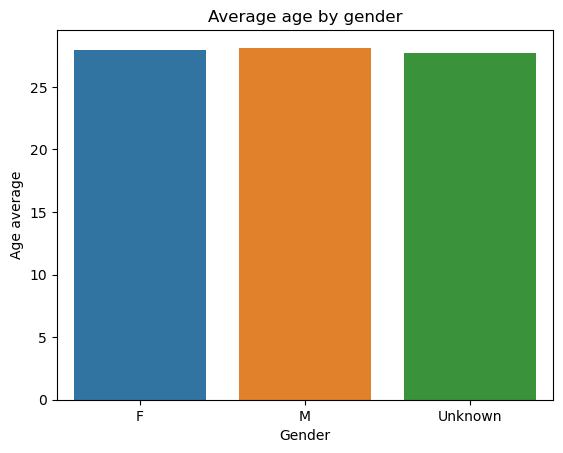

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

sns.barplot(x=sex_age_df.index, y=sex_age_df.values, palette=colors)
plt.title("Average age by gender")
plt.ylabel("Age average")
plt.xlabel("Gender")
plt.show()

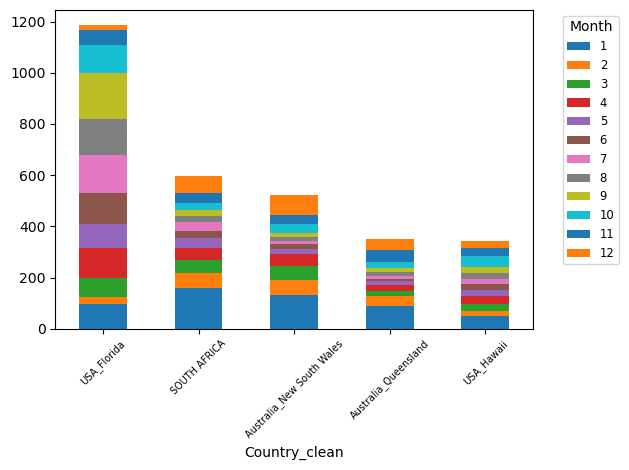

In [47]:
# time of the year with more attacks, by region

df_top_grouped = df_top.groupby(["Country_clean", "Month"]).size().unstack(fill_value=0)

ordered_countries = df_top_grouped.sum(axis=1).sort_values(ascending=False).index

df_top_grouped = df_top_grouped.loc[ordered_countries]

df_top_grouped.plot(kind="bar", stacked=True)
plt.xticks(rotation=45, fontsize=7)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

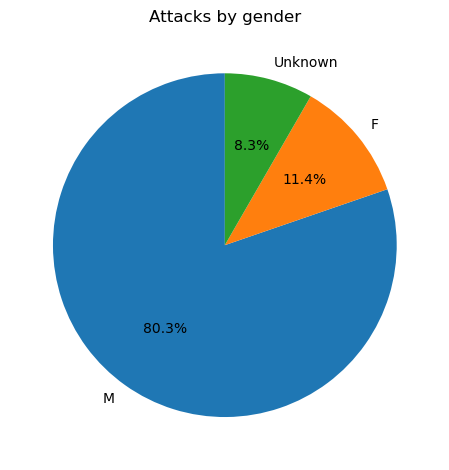

In [ ]:
sex_counts = attacks_clean_df['Sex_clean'].value_counts()
sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Attacks by gender")
plt.ylabel("")  
plt.tight_layout()
plt.show()